## Solving a differential equation numerically

Hello, and welcome to the mini research project on mathematical modelling for infectious diseases. In the eight-week span, we are going to study how to model the spread of a disease and do simulations with Python. We will start from simple SIR models, and add ingredients to allow for the modelling of more realistic factors.

It's a long way to go, so let's start with the basics. In this notebook, we are going to investigate how to solve a differential equation numerically. The contents of this week may appear very mathematical to you. You might even say that you cannot see its connection with the theme of the mini-research problems yet. But trust me, this will be a crucial technique throughout our project, so please stay tuned.

Suppose the equation to be solved takes the form:

$$ y'(x) = \frac{dy}{dx} = f(x, y) \tag{#}$$

with some initial condition $y(x_0) = y_0$.

The spirit is that, if we know the value of $y(x)$ at some $x$, we may use (#) to extrapolate the function value $y(x+h)$ where $h$ is a small increment in the independent variable $x$. This process can be repeatedly carried out with a computer program, so an approximate solution can be obtained.

The two widely used methods we will look at next is
- *the Euler method*
- *the midpoint method*

### The Euler method

The extrapolation scheme of the Euler method is very straightforward

$$ y(x+h) \approx y(x) + y'(x) * h $$

You can sketch a graph of $y(x)$, drop a tangent line at the point $(x, y)$ and construct a right-angled triangle to see why this makes sense.

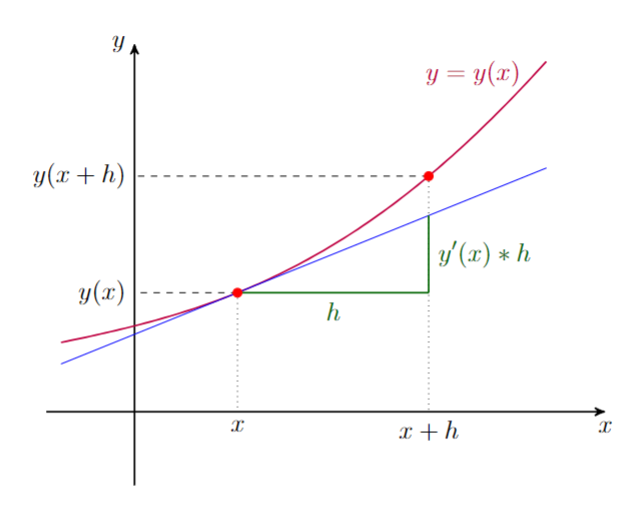

As you can notice, there is a significant difference between the approximated value and the true value for $y(x+h)$ in the diagram shown. The error can be reduced if we take smaller values for $h$. A quick lesson to learn from here is that the approximation works better when the step $h$ is made as small as possible.

### The midpoint method

The midpoint method is an improvement (well, improvement in most cases, but not in all cases) for the Euler method.

Instead of using the gradient of tangent at $x$ to estimate $y(x+h)$, one uses the gradient at the midpoint, i.e., the gradient at $x + \frac{h}{2}$, to make a better estimation for $y(x+h)$. The idea is illustrated below:

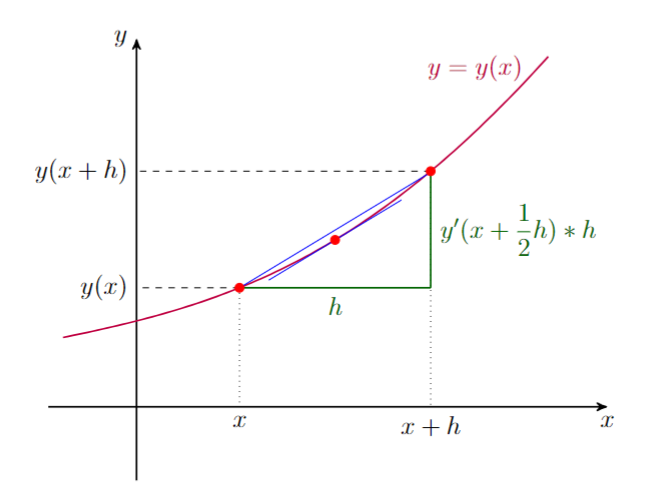

It is evident to see that using the gradient at the midpoint significantly improves the accuracy of the approximation.

To carry out the midpoint approximation, we first adopt the Euler method to extrapolate the function value at the midpoint:

$$ y(x + \frac{h}{2}) \approx y(x) + y'(x) * \frac{h}{2}$$

Then the function value at $x+h$ is taken to be:

$$ y(x+h) \approx y(x) + y'(x + \frac{h}{2}) * h \qquad \text{where } y'(x + \frac{h}{2}) = f(x + \frac{h}{2}, y(x + \frac{h}{2}))$$

### Example 1

The differential equation to be solved is:

$$ \frac{dy}{dx} = y  \qquad \text{ where } y(0) = 1$$

The exact solution of this equation takes the form:

$$ y(x) = e^x $$

We are going to compare the solution obtained using the Euler method with the exact solution.

In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# initialize independent variable x
x_min = 0
x_max = 8
n = 40
step = (x_max - x_min)/n

x = np.linspace(x_min, x_max, n)

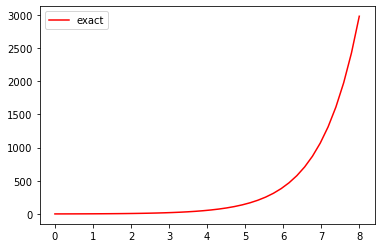

In [3]:
# exact solution
exact_sol1 = np.exp(x)

plt.plot(x, exact_sol1, color='red', label='exact')
plt.rcParams["figure.figsize"] = (10, 6)
plt.legend()
plt.show()

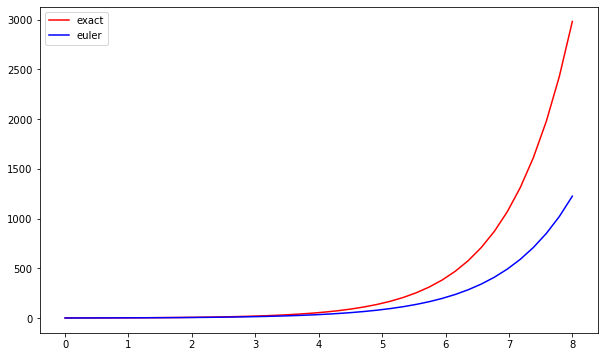

In [4]:
# numerical solution with the Euler method
euler_sol1 = np.zeros_like(x)

# imposing initial condition: y[0] = 1
euler_sol1[0] = 1

# looping through all other points
# computing the function values step by step
for i in range(1, len(x)):
    gradient = euler_sol1[i-1]
    euler_sol1[i] = euler_sol1[i-1] + step * gradient

plt.plot(x, exact_sol1, color='red', label='exact')
plt.plot(x, euler_sol1, color='blue', label='euler')
plt.legend()
plt.show()

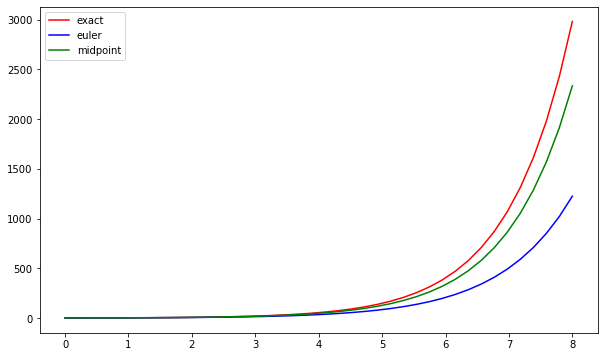

In [5]:
# numerical solution with the midpoint method
midpt_sol1 = np.zeros_like(x)

# imposing initial condition: y[0] = 1
midpt_sol1[0] = 1

for i in range(1, len(x)):
    # estimate midpoint value: y(x + h/2) ≈ y(x) + 1/2 * y'(x) * h
    midpoint = midpt_sol1[i-1] + step * midpt_sol1[i-1] / 2
    # extrapolate y(x+h) using midpoint value: y(x+h) ≈ y(x) + y'(x + h/2) * h
    gradient = midpoint
    midpt_sol1[i] = midpt_sol1[i-1] + step * gradient

plt.plot(x, exact_sol1, color='red', label='exact')
plt.plot(x, euler_sol1, color='blue', label='euler')
plt.plot(x, midpt_sol1, color='green', label='midpoint')
plt.legend()
plt.show()

### Example 2

Let's try another example, say let's try to solve the differential equation:

$$ \frac{dy}{dx} = \cos x  \qquad \text{ where } y(0) = 0$$

It is easy the check that exact solution of this equation is:

$$ y(x) = \sin x $$

Again, this provides a good reference with which we can evaluate the accuracy of our numerical solutions.

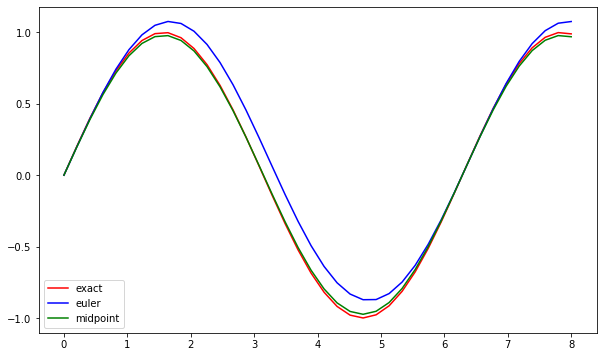

In [6]:
# exact solution
exact_sol2 = np.sin(x)

# numerical solution with the Euler method
euler_sol2 = np.zeros_like(x)
euler_sol2[0] = 0

for i in range(1, len(x)):
    gradient = np.cos(x[i-1])
    euler_sol2[i] = euler_sol2[i-1] + step * gradient


# numerical solution with the midpoint method
midpt_sol2 = np.zeros_like(x)
midpt_sol2[0] = 0

for i in range(1, len(x)):
    gradient = np.cos(x[i-1] + step/2)
    midpt_sol2[i] = midpt_sol2[i-1] + step * gradient

plt.plot(x, exact_sol2, color='red', label='exact')
plt.plot(x, euler_sol2, color='blue', label='euler')
plt.plot(x, midpt_sol2, color='green', label='midpoint')
plt.legend()
plt.show()

#### Example 3

One last example. The differential equation to be solved is:

$$ \frac{dy}{dx} = \frac{6x^2}{y}  \qquad \text{ where } y(0) = 2$$

The numerical solutions are again to be compared with the exact solution, which is:

$$ y(x) = 2\sqrt{x^3 +1} $$

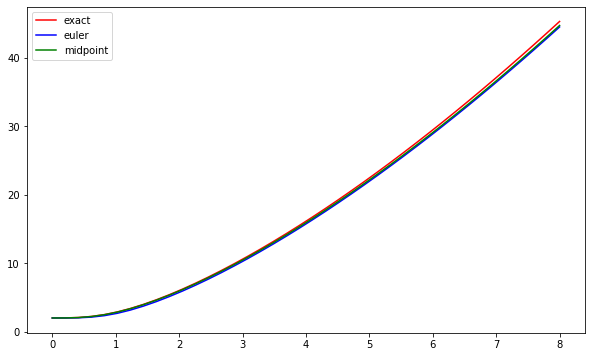

In [7]:
# exact solution
exact_sol3 = 2*np.sqrt(x ** 3 + 1)

# numerical solution with the Euler method
euler_sol3 = np.zeros_like(x)
euler_sol3[0] = 2

for i in range(1, len(x)):
    gradient = 6 * x[i-1]**2 / euler_sol3[i-1]
    euler_sol3[i] = euler_sol3[i-1] + step * gradient

# numerical solution with the midpoint method
midpt_sol3 = np.zeros_like(x)
midpt_sol3[0] = 2

for i in range(1, len(x)):
    gradient = 6 * x[i-1]**2 / midpt_sol3[i-1]
    midpoint = midpt_sol3[i-1] + step * gradient / 2
    gradient = 6 * (x[i-1] + step/2)**2 / midpoint
    midpt_sol3[i] = midpt_sol3[i-1] + step * gradient

plt.plot(x, exact_sol3, color='red', label='exact')
plt.plot(x, euler_sol3, color='blue', label='euler')
plt.plot(x, midpt_sol3, color='green', label='midpoint')
plt.legend()
plt.show()

### Exercises

1. Change the range of the independent variable $x$, rerun the codes and see how does that affect the precision of the numerical solutions?

2. Change the number of grid points $n$, rerun the codes and see how does that affect the precision of the numerical solutions?

3. Solve the following differential equations, both analytically and numerically.

    - $\frac{dy}{dx} = x$ with $y(0) = 1$
    
    - $\frac{dy}{dx} = \sin x $ with $y(0) = 0$
    
    - $\frac{dy}{dx} = -2xy $ with $y(0) = 1$

### Problems

In this notebook, we only dealt with *first-order* differential equations.

How can we generalise the methods to solve a *system* of differential equations?

How can we generalize the methods to solve differential equations of *higher orders*?